In [1]:
from tme3_etu import *
from sklearn import linear_model
from sklearn.multiclass import OneVsRestClassifier

In [2]:
def kernelTrick(data):
    res = np.hstack((
        data,
        (data[:,0] * data[:,0]).reshape(-1,1),
        (data[:,1] * data[:,1]).reshape(-1,1),
        (data[:,0] * data[:,1]).reshape(-1,1),
        np.ones((len(data),1))
    ))
    return res

In [3]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=0, sigma=0.1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=0, sigma=0.1)

#ajout du biais w0 et la colonne de 1 dans datax
trainx2 = np.hstack((trainx, np.ones((len(trainx),1))))
testx2 = np.hstack((testx, np.ones((len(testx),1))))

trainx_kernel = kernelTrick(trainx)
testx_kernel = kernelTrick(testx)

Précision : train 1.952280, test 1.991975


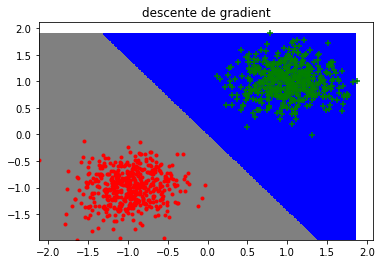

In [4]:
descenteDeGradient = Lineaire(mse,mse_g,max_iter=1000,eps=0.01)

#methodes: batch / minibatch / stochastic
descenteDeGradient.fit(trainx2,trainy,methode='batch')
print("Précision : train %f, test %f"% \
      (descenteDeGradient.score(trainx2,trainy),\
       descenteDeGradient.score(testx2,testy)))

plt.figure()
plot_frontiere(trainx2, descenteDeGradient.predict, 200)
plt.title('descente de gradient')
plot_data(trainx,trainy)

Précision : train 0.255710, test 0.261029


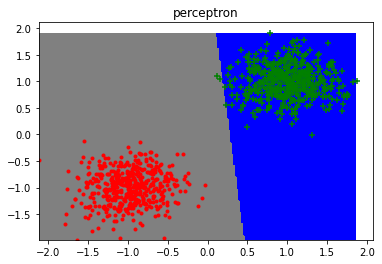

In [17]:
perceptron = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.01)

#methodes: batch / minibatch / stochastic
perceptron.fit(trainx2,trainy, methode='batch')
print("Précision : train %f, test %f"% \
      (perceptron.score(trainx2,trainy),\
       perceptron.score(testx2,testy)))

plt.figure()
plot_frontiere(trainx2,perceptron.predict, 200)
plt.title('perceptron')
plot_data(trainx,trainy)

Précision : train 0.988000, test 0.987000


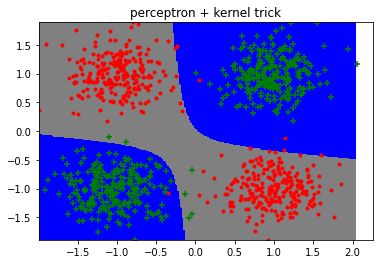

In [62]:
perceptronKernel = Lineaire(hinge,hinge_g,max_iter=1000,eps=0.01)

#methodes: batch / minibatch / stochastic
perceptronKernel.fit(trainx_kernel, trainy, methode='batch')

print("Précision : train %f, test %f"% \
      (perceptronKernel.score(trainx_kernel,trainy),\
       perceptronKernel.score(testx_kernel,testy)))

plt.figure()
plot_frontiere(trainx_kernel, perceptronKernel.predict, 200, kernel=True)
plt.title('perceptron + kernel trick')
plot_data(trainx,trainy)

# DONNEES USPS

In [4]:
X,Y = load_usps("USPS_train.txt")
x,y = load_usps("USPS_test.txt")

In [5]:
d69X,d69Y = X[(Y==6)|(Y==9)],Y[(Y==6)|(Y==9)]
d69Y = np.where(d69Y==6,-1,1)
d69x,d69y = x[(y==6)|(y==9)],y[(y==6)|(y==9)]
d69y = np.where(d69y==6,-1,1)

In [6]:
d6AX,d6AY = X,Y
d6AY = np.where(d6AY==6,1,-1)
d6Ax,d6Ay = x,y
d6Ay = np.where(d6Ay==6,1,-1)

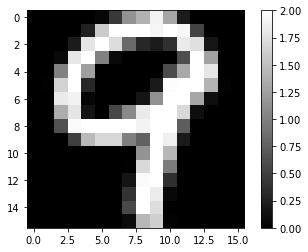

In [7]:
show_usps(x[0])

In [42]:
clf = linear_model.Ridge(alpha=0.1)
clf = OneVsRestClassifier(clf).fit(X,Y)

In [43]:
np.mean(clf.predict(x)==y)

0.8694569008470354

In [7]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(d69X,d69Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

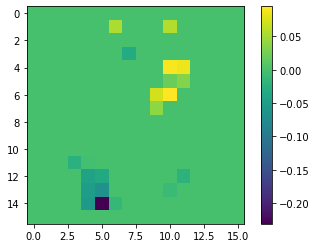

In [11]:
plt.imshow(clf.coef_.reshape((16,16)))
plt.colorbar()
plt.show()

In [12]:
clf.score(d69x,d69y)

0.8527868148733442

<font color='green'>eps=0.001 pour mse et 0.1 pour hinge

In [9]:
perceptron = Lineaire(hinge, hinge_g, max_iter=1000, eps=0.1)
perceptron.fit(d69X, d69Y, methode='minibatch')

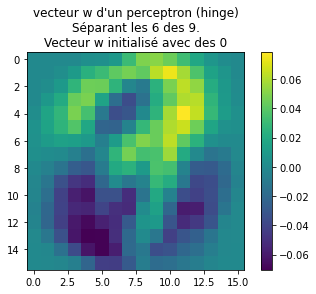

In [10]:
plt.imshow(perceptron.w.reshape((16,16)))
plt.colorbar()
plt.title("vecteur w d'un perceptron (hinge)\nSéparant les 6 des 9.\nVecteur w initialisé avec des 0")
plt.show()

In [11]:
perceptron.score(d69x,d69y)

1.1930596139795966

In [27]:
scores_test = []
scores_train = []
iters = [10, 100, 1000, 5000, 10000]

for nbiter in iters:
    perceptron = Lineaire(mse, mse_g, max_iter=nbiter, eps=0.005)
    perceptron.fit(d69X, d69Y,methode='stochastic')
    scores_test.append(perceptron.score(d69x,d69y))
    scores_train.append(perceptron.score(d69X,d69Y))

Text(0, 0.5, 'erreur')

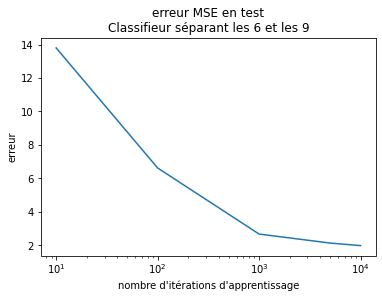

In [28]:
fig, ax = plt.subplots(1,1)
img = ax.plot(iters, scores_test)
ax.set_title("erreur MSE en test\nClassifieur séparant les 6 et les 9")
ax.set_xscale('log')
ax.set_xlabel("nombre d'itérations d'apprentissage")
ax.set_ylabel("erreur")

Text(0, 0.5, 'erreur')

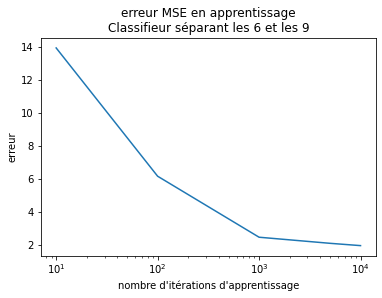

In [29]:
fig, ax = plt.subplots(1,1)
img = ax.plot(iters, scores_train)
ax.set_title("erreur MSE en apprentissage\nClassifieur séparant les 6 et les 9")
ax.set_xscale('log')
ax.set_xlabel("nombre d'itérations d'apprentissage")
ax.set_ylabel("erreur")

<font color='green'>
        on visualise ici la matrice de poids w sur un dataset composé de 6 (label -1) et de 9 (label 1). les poids positifs participent pour la classe 9 et les poids negatifs participent pour la classe 6. Ici on voit que la partie arrondie du bas participent plus aux 6
    <br>
    au début au niveau des angles on avait des valeurs positives (qui n'a pas de sens car les pixels sont noirs, il y avait beaucoup de bruit dû à l'initialisation aléatoire du w). Cependant en initialisant le w avec que des 0 on obtient l'image du dessus qui est , je cite , "magnifique". on voit très bien le 6 et le 9.

In [ ]:
perceptron = Lineaire(ridge,lasso_g,max_iter=1000,eps=0.001)
perceptron.fit(d6AX,d6AY)

In [ ]:
clf = linear_model.Ridge(alpha=1)
clf.fit(d6AX,d6AY)

In [ ]:
plt.imshow(clf.coef_.reshape((16,16)))
plt.colorbar()
plt.show()

In [ ]:
np.argmax(clf.predict(d6Ax))

In [ ]:
d6Ay[344]

In [ ]:
plt.imshow(perceptron.w.reshape((16,16)))
plt.colorbar()
plt.show()

In [ ]:
perceptron.score(d6Ax,d6Ay)

In [ ]:
np.sum(perceptron.predict(d6Ax)==1)

In [ ]:
np.sum(d6Ay==1)